In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from csv import DictReader
from datetime import datetime
from collections import defaultdict
import json
import pandas as pd
import collections
from datetime import datetime
import time

In [2]:
delay2 = []

reader = DictReader(open('DATA/delays.csv', 'rt', encoding='utf-8'))
for row in reader:
    timestamp = datetime.fromtimestamp(int(row["timestamp"])).strftime('%Y-%m-%d %H:%M')
    train_no = row["train_no"]
    train_type = row["train_type"]
    station_id = row["station_id"]
    delay_type = row["delay_type"]
    delay = row["delay"]
    delay2.append([timestamp,train_no,train_type,station_id,delay_type,delay])

delays = np.asarray(delay2)
#print(delays)

In [3]:
edge = []

reader = DictReader(open('DATA/rail_edgelist.csv', 'rt', encoding='utf-8'))
for a, b in reader:
    edge.append((a, b))

edges = np.asarray(edge)
#print(delays)

In [4]:
slovar = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    slovar[tn] += int(d)

sort = {k: v for k, v in sorted(slovar.items(), key=lambda y: y[1], reverse=True)[:10]}
df = pd.DataFrame(sort.items(), columns =['Train_no', 'delay(min)'])

df

Train_no  delay(min)
0      212     1507863
1      158     1398049
2      502     1219703
3      499     1178623
4      503     1173924
5      415      962358
6      498      897636
7      414      863110
8      246      788474
9     1415      652435

In [5]:
node = []
nodes_dict = defaultdict(lambda: 0)

reader = DictReader(open('DATA/rail_nodes.csv', 'rt', encoding='utf-8'))
for row in reader:
    id = row["id"]
    station_name = row["station_name"]
    lat = row["lat"]
    lng = row["lng"]
    
    node.append([id,station_name,lat,lng])
    nodes_dict[id] = station_name
    
nodes = np.asarray(node)
#print(nodes_dict)

In [6]:
ts_delays = defaultdict(lambda: 0)
ts_delays_d = defaultdict(lambda: 0)
ts_delays_a = defaultdict(lambda: 0)
ts_delays_e = defaultdict(lambda: 0)


for ts, tn, tt, si, dt, d in delays:
    month = ts[5:7]
    if (int(d) > 0):
        ts_delays[month] += 1
        if (dt == "D"):
            ts_delays_d[month] += 1
        if (dt == "A"):
            ts_delays_a[month] += 1
        if (dt == "E"):
            ts_delays_e[month] += 1
        
#sort_ts_delays = {k: v for k, v in sorted(ts_delays.items(), key=lambda y: y[1], reverse=True)}

sort_ts_delays = collections.OrderedDict(sorted(ts_delays.items()))
sort_ts_delays_d = collections.OrderedDict(sorted(ts_delays_d.items()))
sort_ts_delays_a = collections.OrderedDict(sorted(ts_delays_a.items()))
sort_ts_delays_e = collections.OrderedDict(sorted(ts_delays_e.items()))

#print(sort_ts_delays)
#print(sort_ts_delays_d)
#print(sort_ts_delays_a)
#print(sort_ts_delays_e)

Text(0, 0.5, 'Delays')

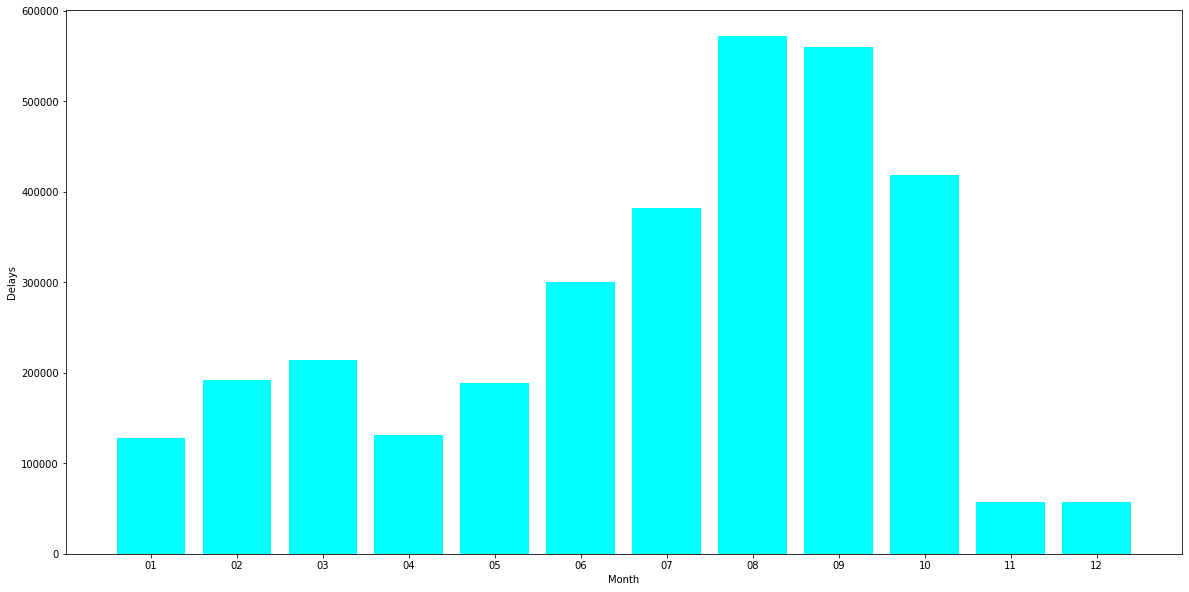

In [7]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays.keys(), sort_ts_delays.values(),color="cyan")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

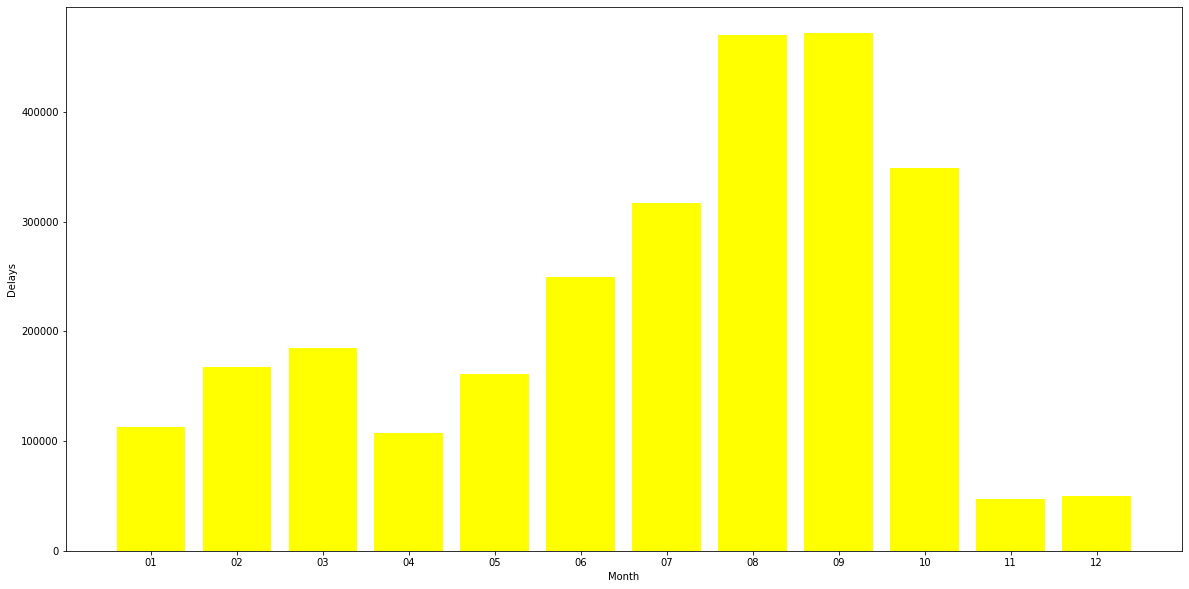

In [8]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_d.keys(), sort_ts_delays_d.values(),color="yellow")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

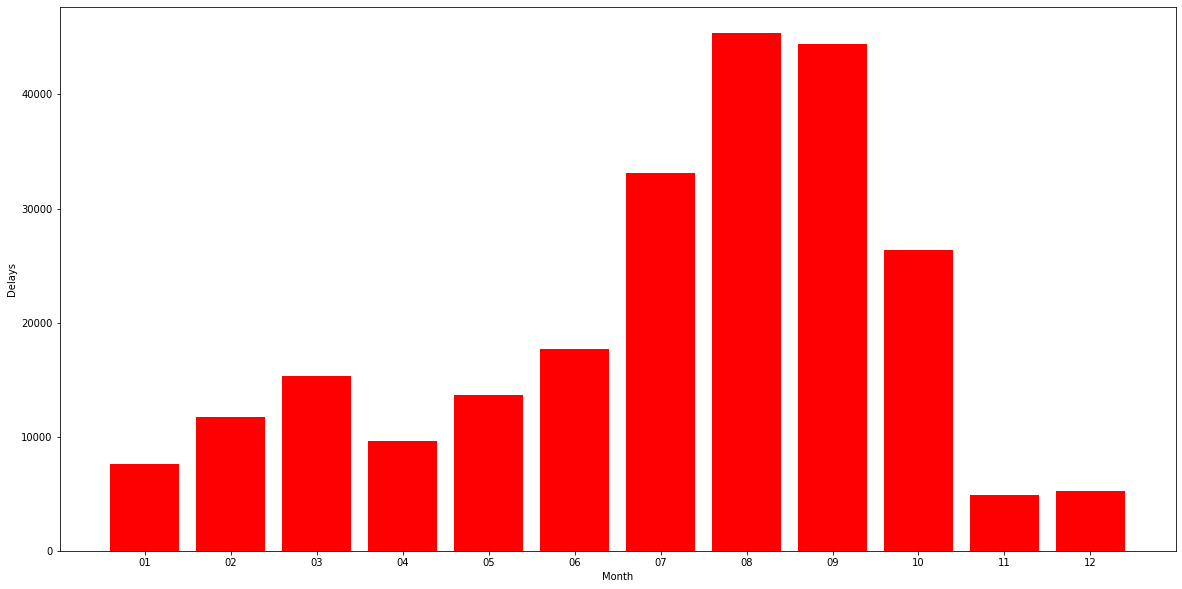

In [9]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_a.keys(), sort_ts_delays_a.values(),color="red")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

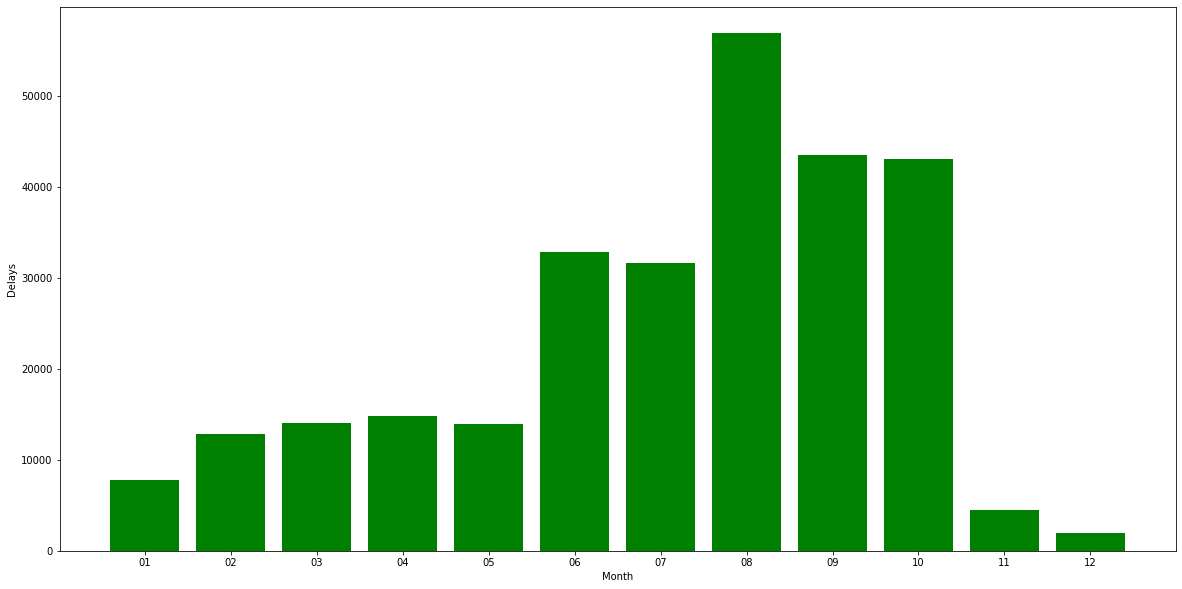

In [10]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_e.keys(), sort_ts_delays_e.values(),color="green")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

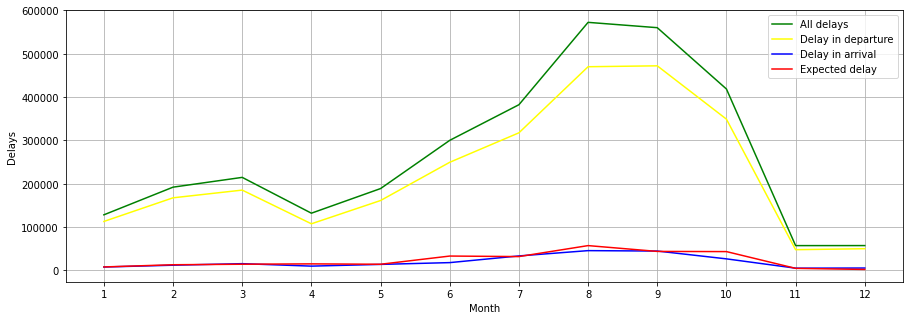

In [11]:
plt.figure(figsize=(15, 5))
plt.grid()
tsk = list(sort_ts_delays.keys())
tsk2 = []
for i in tsk:
    tsk2.append(int(i))
tsv = list(sort_ts_delays.values())
plt.xticks(tsk2)
plt.plot(tsk2, tsv, label = "All delays", color = "green")
plt.legend(loc = "upper right")

tsk_d = list(sort_ts_delays_d.keys())
tsk_d2 = []
for i in tsk_d:
    tsk_d2.append(int(i))
tsv_d = list(sort_ts_delays_d.values())
plt.xticks(tsk_d2)
plt.plot(tsk_d2, tsv_d, label = "Delay in departure", color = "yellow")
plt.legend(loc = "upper right")

tsk_a = list(sort_ts_delays_a.keys())
tsk_a2 = []
for i in tsk_a:
    tsk_a2.append(int(i))
tsv_a = list(sort_ts_delays_a.values())
plt.xticks(tsk_a2)
plt.plot(tsk_a2, tsv_a, label = "Delay in arrival", color = "blue")
plt.legend(loc = "upper right")

tsk_e = list(sort_ts_delays_e.keys())
tsk_e2 = []
for i in tsk_e:
    tsk_e2.append(int(i))
tsv_e = list(sort_ts_delays_e.values())
plt.xticks(tsk_e2)
plt.plot(tsk_e2, tsv_e, label = "Expected delay", color = "red")
plt.legend(loc = "upper right")



plt.xlabel("Month")
plt.ylabel("Delays")


In [12]:
delay_tipi_a = defaultdict(lambda: 0)
delay_tipi_d = defaultdict(lambda: 0)
delay_tipi_e = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if (dt == "A"):
        delay_tipi_a[tt] += 1
    if (dt == "D"):
        delay_tipi_d[tt] += 1
    if (dt == "E"):
        delay_tipi_e[tt] += 1

#print(delay_tipi_a)
#print(delay_tipi_d)
#print(delay_tipi_e)

Text(0, 0.5, 'Delays')

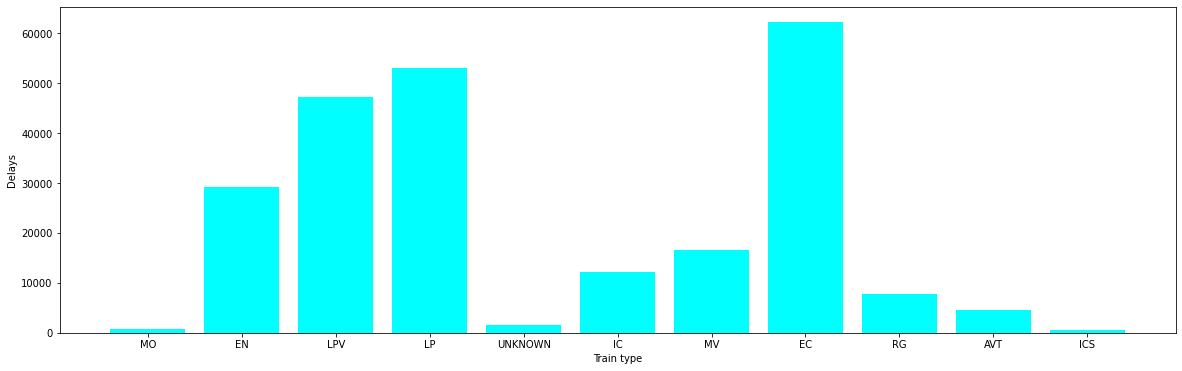

In [13]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_a.keys(), delay_tipi_a.values(),color="cyan")
plt.xlabel("Train type")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

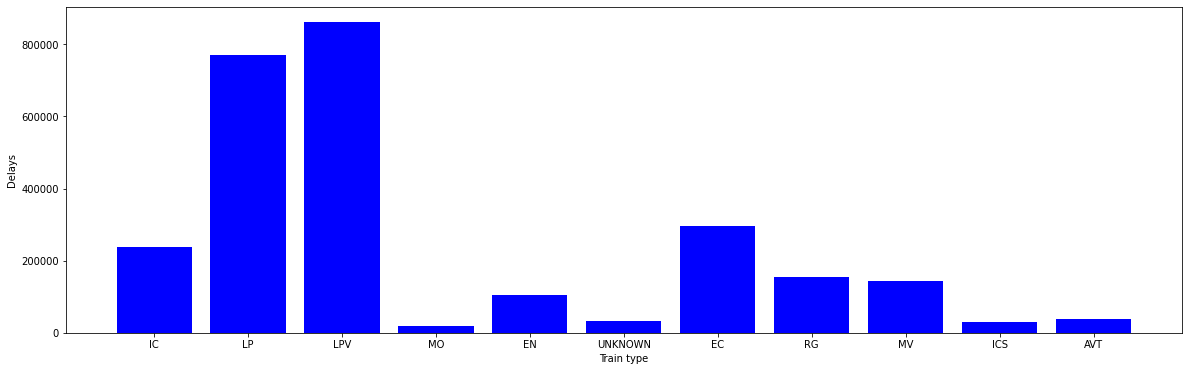

In [14]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_d.keys(), delay_tipi_d.values(),color="blue")
plt.xlabel("Train type")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

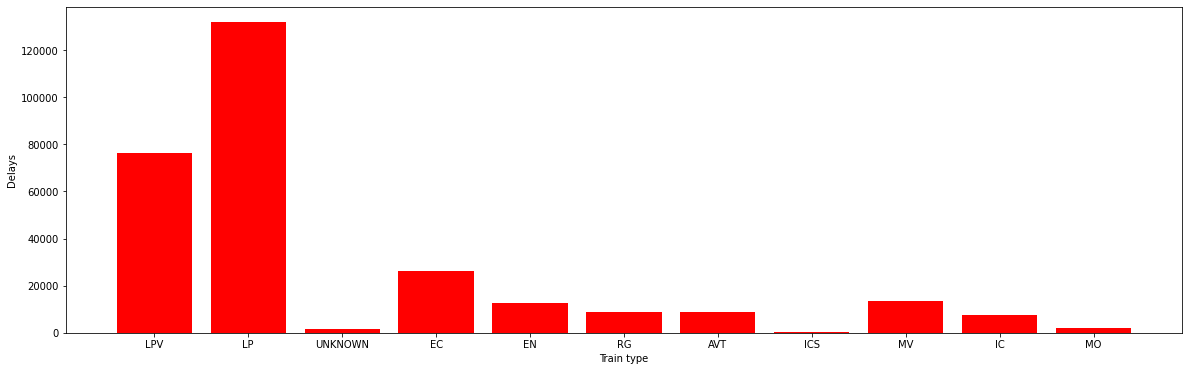

In [15]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_e.keys(), delay_tipi_e.values(),color="red")
plt.xlabel("Train type")
plt.ylabel("Delays")

In [16]:
train_stations = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if (dt == "A"):
        train_stations[nodes_dict[si]] += 1
    if (dt == "D"):
        train_stations[nodes_dict[si]] += 1
    if (dt == "E"):
        train_stations[nodes_dict[si]] += 1


In [17]:
sort_train_stations = dict(sorted(train_stations.items(), key=lambda item: item[1], reverse=True))

In [18]:
seznam_train_stations = list(sort_train_stations.items())[0:10]

In [19]:
print(seznam_train_stations)

[('Ljubljana', 116785), ('Jesenice', 108836), ('Zidani Most', 104024), ('Dobova', 102076), ('Kranj', 88350), ('Divača', 82564), ('Bohinjska Bistrica', 79431), ('Ljubljana Zalog', 61811), ('Most na Soči', 57235), ('Sevnica', 56178)]


In [20]:

slovar = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    slovar[si] += int(d)
    
sort = {k: v for k, v in sorted(slovar.items(), key=lambda y: y[1], reverse=True)}
df = pd.DataFrame(sort.items(), columns =['Station_id', 'delay(min)'])

df

Station_id  delay(min)
0        42300     3101292
1        42400     2686181
2        42001     2144025
3        42200     1949111
4        42207     1382677
..         ...         ...
122      42907         510
123      43605         220
124      43202         160
125      42501          90
126      43501          70

[127 rows x 2 columns]

In [21]:
slovar3 = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if (int(d) > 0):
        slovar3[si] += 1
        
sort = {k: v for k, v in sorted(slovar3.items(), key=lambda y: y[1], reverse=True)}
df = pd.DataFrame(sort.items(), columns =['Station_id', 'no_delays'])

df

Station_id  no_delays
0        42300     112714
1        42400     107223
2        42200     104024
3        42001     100478
4        42307      88345
..         ...        ...
122      43605         24
123      42905         20
124      42501         10
125      43202         10
126      43501          5

[127 rows x 2 columns]

In [22]:
povprecje = defaultdict(list)

for d in (slovar, slovar3): # you can list as many input dicts as you want here
    for key, value in d.items():
        povprecje[key].append(value)
    

In [23]:
slovar4 = defaultdict(lambda: 0)

for x in povprecje.items():
    #print(x[1][0])
    pop = int(x[1][0]) / int(x[1][1])
    slovar4[x[0]] = pop

#print(slovar4)

In [24]:
zamude = defaultdict(lambda: 0)
for x, y in slovar4.items():
    zamude[nodes_dict[x]] = y
    
sort = {k: v for k, v in sorted(zamude.items(), key=lambda y: y[1], reverse=True)[:10]}
df = pd.DataFrame(sort.items(), columns =['Station', 'delay_avg(min)'])

df

Station  delay_avg(min)
0          Šentrupert       66.000000
1            Mokronog       54.000000
2              Litija       35.052401
3  Novo mesto Kandija       34.300000
4             Šentilj       27.796242
5       Kamnik Graben       27.607800
6           Ljubljana       27.514701
7            Jesenice       25.052284
8             Metlika       23.561525
9           Žirovnica       23.158382

Text(0, 0.5, 'povprečna zamuda (min)')

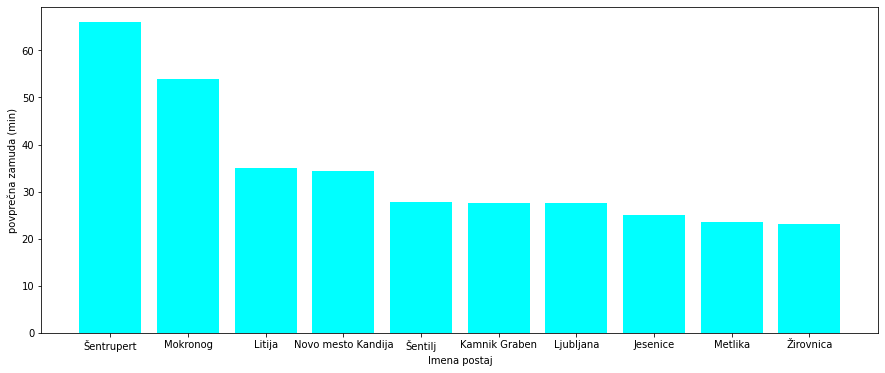

In [25]:
plt.figure(figsize=(15, 6))
#plt.xticks(rotation=90)
plt.bar(sort.keys(), sort.values(), color="cyan")
plt.xlabel("Imena postaj")
plt.ylabel("povprečna zamuda (min)")

In [26]:
with open('DATA/train_schedule.json') as json_file:
    urnik = json.load(json_file)

In [28]:
zidani_most = '42200' 
dep = defaultdict(lambda: 0)

for vlak in urnik:
    #print(urnik[u]['train_stations'])
    for i in urnik[vlak]['train_stations']:
        #print(i)
        #print(i['id'])
        if i['id'] == zidani_most and i['dep'] != None:
            #print(vlak)
            #print(i['dep'])
            dep[vlak] = i['dep']

In [29]:
dep2 = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if ts[:10] == '2020-07-15' and si == "42200":
        time = ts[11:]
        dep2[tn] = time        

In [30]:
glavni_dep = defaultdict(lambda: 0)

for k, v in dep.items():
    if k in dep2:
        glavni_dep[k] = v

In [31]:
dep3 = defaultdict(lambda: 0)

for k, v in dep2.items():
    if k in glavni_dep:
        dep3[k] = v

In [32]:
sort_glavni_dep = {k: v for k, v in sorted(glavni_dep.items(), key=lambda item: item[1])}
sort_dep3 = {k: v for k, v in sorted(dep3.items(), key=lambda item: item[1])}
#print(sort_glavni_dep)
#print(sort_dep3)

In [33]:
df1 = pd.DataFrame(sort_glavni_dep.items(), columns=['vlak', 'vozni red odhod'])
df2 = pd.DataFrame(sort_dep3.items(), columns=['vlak', 'dejanski odhod (2020-07-15)'])

df = pd.merge(df1, df2, on="vlak")

In [34]:
df

vlak vozni red odhod dejanski odhod (2020-07-15)
0    512           06:29                       06:49
1     11           06:53                       07:14
2   2252           06:57                       07:19
3   2902           07:00                       07:19
4    499           07:13                       07:34
5     14           08:48                       09:19
6   2202           09:00                       09:14
7   2807           09:05                       09:24
8    415           09:23                       09:49
9   2908           09:26                       09:19
10  2259           10:00                       10:19
11   247           10:22                       10:39
12  2910           11:00                       11:29
13  2261           11:03                       11:29
14  2803           12:00                       11:39
15  2262           13:02                       13:14
16  2914           13:04                       13:19
17   210           14:22                       14:39
18   246           15:38                       16:04
19   211           15:43                       16:04
20  2268           15:58                       16:14
21    20           15:58                       16:19
22  2904           16:02                       16:29
23   150           16:57                       16:49
24  2207           17:29                       17:59
25   502           18:38                       18:49